In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))

# import data

In [2]:
corona = pd.read_csv('..\\corona_lb_ratios.csv', header=0)

In [3]:
corona

,date,year,month,day,new_cases,new_deaths,local,travelers,prev_cases,prev_deaths,total_cases,total_deaths,month_avg_ratio,cumulative_avg_ratio,diff_avg_ratio,simple_ratio
0,2/1/2020,2020,2,1,0,0,1,0,0,0,0,0,-1.000000,-1.000000,-0.111737,-0.055159
1,2/2/2020,2020,2,2,0,0,1,0,0,0,0,0,-1.000000,-1.000000,-0.111737,-0.055159
2,2/3/2020,2020,2,3,0,0,1,0,0,0,0,0,-1.000000,-1.000000,-0.111737,-0.055159
3,2/4/2020,2020,2,4,0,0,1,0,0,0,0,0,-1.000000,-1.000000,-0.111737,-0.055159
4,2/5/2020,2020,2,5,0,0,1,0,0,0,0,0,-1.000000,-1.000000,-0.111737,-0.055159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,9/20/2020,2020,9,20,1006,11,1,0,779,5,29325,308,0.280827,0.662586,-0.930880,-0.703502
233,9/21/2020,2020,9,21,684,10,1,0,1006,11,30009,318,0.029574,0.230200,1.000000,0.783171
234,9/22/2020,2020,9,22,851,8,1,0,684,10,30860,326,0.001310,0.289731,-0.654290,-0.057143
235,9/23/2020,2020,9,23,940,13,1,0,851,8,31800,339,0.368152,0.579575,-0.392999,-0.857452


# days statistics

In [4]:
d_X = range(len(corona))
d_month_avg_ratio = corona.month_avg_ratio
d_cumulative_avg_ratio = corona.cumulative_avg_ratio
d_diff_avg_ratio = corona.diff_avg_ratio
d_simple_ratio = corona.simple_ratio
d_zero = [0 for _ in range(len(d_X))]

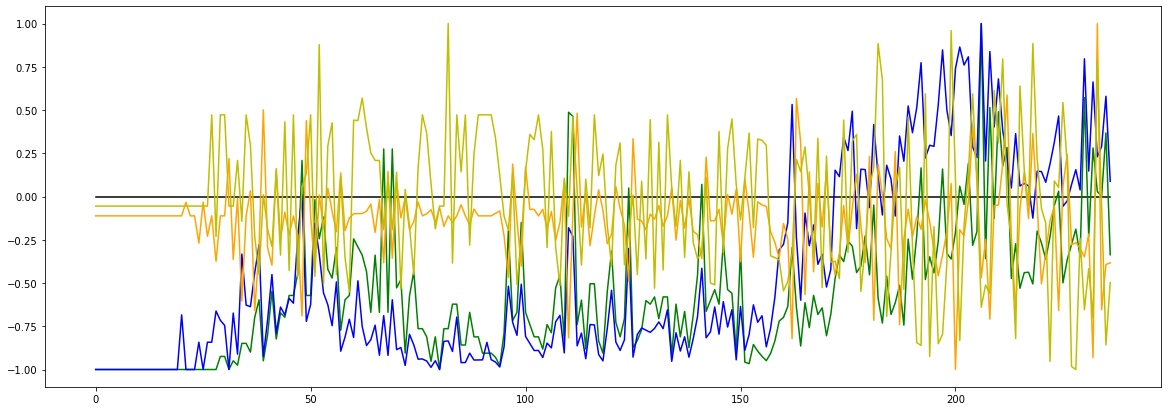

In [5]:
plt.figure(figsize=(20, 7))
plt.plot(
    d_X, d_zero, 'black', 
    d_X, d_month_avg_ratio, 'g',
    d_X, d_cumulative_avg_ratio, 'b',
    d_X, d_diff_avg_ratio, 'orange',
    d_X, d_simple_ratio, 'y',
)

# months statistics

In [6]:
config = {
    'month': 'first',
    'month_avg_ratio': 'mean',
    'cumulative_avg_ratio': 'mean',
    'diff_avg_ratio': 'mean',
    'simple_ratio': 'mean',
}
months_data = corona.groupby('month').agg(config).reset_index(drop=True)
months_data

,month,month_avg_ratio,cumulative_avg_ratio,diff_avg_ratio,simple_ratio
0,2,-1.000000,-0.961110,-0.124869,-0.043031
1,3,-0.618993,-0.601823,-0.140193,0.012667
2,4,-0.597059,-0.858093,-0.106932,0.138702
3,5,-0.622243,-0.779238,-0.123697,0.067174
4,6,-0.609651,-0.758081,-0.112985,-0.060189
5,7,-0.619230,-0.236884,-0.157093,-0.060505
6,8,-0.183201,0.431394,-0.153078,-0.097305
7,9,-0.197193,0.200123,-0.200280,-0.173080


In [7]:
m_X = months_data.month
m_month_avg_ratio = months_data.month_avg_ratio
m_cumulative_avg_ratio = months_data.cumulative_avg_ratio
m_diff_avg_ratio = months_data.diff_avg_ratio
m_simple_ratio = months_data.simple_ratio
m_zero = [0 for _ in range(len(m_X))]

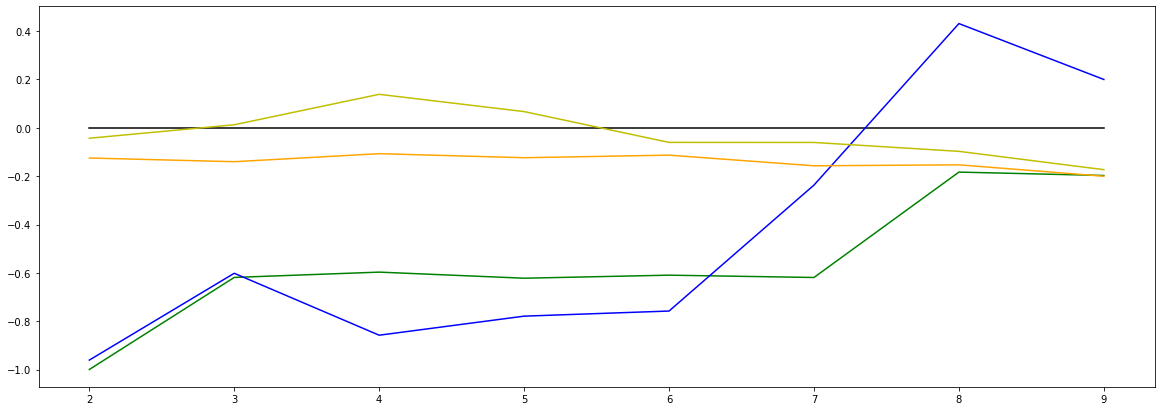

In [8]:
plt.figure(figsize=(20, 7))
plt.plot(
    m_X, m_zero, 'black', 
    m_X, m_month_avg_ratio, 'g',
    m_X, m_cumulative_avg_ratio, 'b',
    m_X, m_diff_avg_ratio, 'orange',
    m_X, m_simple_ratio, 'y',
)


# Explanation

1. `Green` (month_avg_ratio)
    - The situtation curve according to each month overall situation. 
    - Formula = new cases / month's avg (from the view of the whole month)
    - It visualize the new cases & deaths situation according to the whole month average.
    - Useful for checking each month overall cases & death situation. 
    - `y increase == cases & deaths ratio increases == not a good sign (compared to month data)`


2. `Blue` (cumulative_avg_ratio)
    - The situtation curve according to the cumulative cases days data average. 
    - Formula = new cases / cumualtive cases days average (from the view of previous cases data)
    - It visualize the new cases & deaths situation according to the cumulative average from the first time a case showed up.
    - Useful for checking the cumulative situation till a specific date.
    - `y increase == cases & deaths ratio increases == not a good sign (compared to all previous data)`
    

3. `Orange` (diff_avg_ratio)
    - The situtation curve according to the cumulative cases days data diff average. 
    - Formula = (prev cases - new cases) / cumualtive cases days diff average (from the view of previous cases data diff data)
    - It visualize the change in cases & deaths cases over time.
    - Useful for checking the change in cases.
    - `y increase or decreasse == big previous & new cases/deaths diff == hotspot`


4. `Yellow` (simple_ratio)
    - The situtation curve according to simple ratio (Formula = a / b) relation.
    - It visualize the simple relation btw new and previous cases & deaths.
    - `y increase == new cases/deaths is less than previous cases/deaths == positive situation`


5. `Black`
    - The Zero (Neutral) Line, where y = 0

# Observations

1. `month_avg_ratio` ==> use `months` data


2. `cumulative_avg_ratio` ==> use `months` data


3. `diff_avg_ratio` ==> use `days` data


4. `simple_ratio` ==> use `days` data


# What I choose

1. `cumulative_avg_ratio` for general corona situation


2. `diff_avg_ratio` for hotspots/hotevents